Notebook for NYC Parking Violations based on vehicle type

### Check for 2017 data


In [9]:
import pandas as pd

df = pd.read_csv('../../data/main_data/cleaned/Parking_Violations_Issued_2017.csv', low_memory=False)

In [10]:
df['Issue Date'] = pd.to_datetime(df['Issue Date'])
df['Month'] = df['Issue Date'].dt.month

# Group by month, car type, and precinct, and count the number of violations
grouped_data = df.groupby(['Month', 'Vehicle Body Type', 'Violation Precinct']).size().reset_index(name='Violation Count')

# Pivot the table to have car types as columns
pivot_table = grouped_data.pivot_table(values='Violation Count', index=['Month', 'Violation Precinct'], columns='Vehicle Body Type', fill_value=0)

# Calculate the percentage of violations for each car type at each precinct
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

pivot_table_percentage


Vehicle Body Type             2DSD       4DSD    A  ACUR   AN  BIKE  BITE  \
Month Violation Precinct                                                    
1     1                   0.701754  14.035088  0.0   0.0  0.0   0.0   0.0   
      5                   0.806452  21.774194  0.0   0.0  0.0   0.0   0.0   
      6                   1.941748  24.271845  0.0   0.0  0.0   0.0   0.0   
      7                   1.315789  27.631579  0.0   0.0  0.0   0.0   0.0   
      9                   4.310345  32.758621  0.0   0.0  0.0   0.0   0.0   
...                            ...        ...  ...   ...  ...   ...   ...   
12    115                 1.226994  33.128834  0.0   0.0  0.0   0.0   0.0   
      120                 0.000000  27.272727  0.0   0.0  0.0   0.0   0.0   
      121                 3.125000  31.250000  0.0   0.0  0.0   0.0   0.0   
      122                 0.000000  35.135135  0.0   0.0  0.0   0.0   0.0   
      123                 0.000000  54.545455  0.0   0.0  0.0   0.0   0.0   

Vehicle Body Type         BOAT  BOXT   BS  ...  UITL   UT      UTIL  UTL    V  \
Month Violation Precinct                   ...                                  
1     1                    0.0   0.0  0.0  ...   0.0  0.0  1.403509  0.0  0.0   
      5                    0.0   0.0  0.0  ...   0.0  0.0  0.000000  0.0  0.0   
      6                    0.0   0.0  0.0  ...   0.0  0.0  1.941748  0.0  0.0   
      7                    0.0   0.0  0.0  ...   0.0  0.0  0.000000  0.0  0.0   
      9                    0.0   0.0  0.0  ...   0.0  0.0  0.862069  0.0  0.0   
...                        ...   ...  ...  ...   ...  ...       ...  ...  ...   
12    115                  0.0   0.0  0.0  ...   0.0  0.0  1.840491  0.0  0.0   
      120                  0.0   0.0  0.0  ...   0.0  0.0  0.000000  0.0  0.0   
      121                  0.0   0.0  0.0  ...   0.0  0.0  0.000000  0.0  0.0   
      122                  0.0   0.0  0.0  ...   0.0  0.0  0.000000  0.0  0.0   
      123                  0.0   0.0  0.0  ...   0.0  0.0  0.000000  0.0  0.0   

Vehicle Body Type         VAHO        VAN  VANT  VNTR      W/DR  
Month Violation Precinct                                         
1     1                    0.0  36.842105   0.0   0.0  0.000000  
      5                    0.0  21.774194   0.0   0.0  0.000000  
      6                    0.0  21.359223   0.0   0.0  0.000000  
      7                    0.0   9.210526   0.0   0.0  0.000000  
      9                    0.0  13.793103   0.0   0.0  0.862069  
...                        ...        ...   ...   ...       ...  
12    115                  0.0   9.202454   0.0   0.0  0.000000  
      120                  0.0   6.060606   0.0   0.0  0.000000  
      121                  0.0   0.000000   0.0   0.0  0.000000  
      122                  0.0   2.702703   0.0   0.0  0.000000  
      123                  0.0   9.090909   0.0   0.0  0.000000  

[914 rows x 129 columns]

In [11]:
unique_precincts = df['Violation Precinct'].unique()
unique_body_types = df['Vehicle Body Type'].unique()

print("Number of unique precincts:", len(unique_precincts))
print("Number of unique vehicle  body types:", len(unique_body_types))

Number of unique precincts: 77
Number of unique vehicle  body types: 130


In [12]:
vehicle_type_counts = df['Vehicle Body Type'].value_counts()
top_vehicle_types = vehicle_type_counts.head(10).index
df_top_vehicle_types = df[df['Vehicle Body Type'].isin(top_vehicle_types)]

percentage_by_vehicle_type = (df_top_vehicle_types['Vehicle Body Type'].value_counts() / len(df)) * 100
print(percentage_by_vehicle_type)

Vehicle Body Type
SUBN    33.389633
4DSD    27.177635
VAN     15.285964
DELV     7.826441
SDN      4.512522
2DSD     2.599884
PICK     2.506698
REFG     1.097263
TRAC     0.866628
UTIL     0.627839
Name: count, dtype: float64


In [13]:
percentage_by_vehicle_type[:10].sum()

95.89050669772861

### Car Types csv for 2017

In [14]:
df['Issue Date'] = pd.to_datetime(df['Issue Date'])
df['Month'] = df['Issue Date'].dt.month

vehicle_type_counts = df['Vehicle Body Type'].value_counts()
top_vehicle_types = vehicle_type_counts.head(10).index

df_top_vehicle_types = df[df['Vehicle Body Type'].isin(top_vehicle_types)]
grouped_data = df_top_vehicle_types.groupby(['Month', 'Vehicle Body Type', 'Violation Precinct']).size().reset_index(name='Violation Count')
pivot_table = grouped_data.pivot_table(values='Violation Count', index=['Month', 'Violation Precinct'], columns='Vehicle Body Type', fill_value=0)
pivot_table_percentage_top10 = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

pivot_table_percentage_top10


Vehicle Body Type             2DSD       4DSD       DELV      PICK      REFG  \
Month Violation Precinct                                                       
1     1                   0.732601  14.652015  17.582418  5.128205  2.197802   
      5                   0.847458  22.881356   5.932203  3.389831  2.542373   
      6                   2.000000  25.000000  10.000000  5.000000  2.000000   
      7                   1.388889  29.166667   8.333333  2.777778  2.777778   
      9                   4.424779  33.628319  11.504425  2.654867  2.654867   
...                            ...        ...        ...       ...       ...   
12    115                 1.282051  34.615385   3.205128  1.923077  0.641026   
      120                 0.000000  29.032258   3.225806  3.225806  0.000000   
      121                 3.125000  31.250000   6.250000  3.125000  0.000000   
      122                 0.000000  38.235294   0.000000  5.882353  0.000000   
      123                 0.000000  60.000000   0.000000  0.000000  0.000000   

Vehicle Body Type              SDN       SUBN      TRAC      UTIL        VAN  
Month Violation Precinct                                                      
1     1                   0.366300  19.047619  0.366300  1.465201  38.461538  
      5                   0.847458  40.677966  0.000000  0.000000  22.881356  
      6                   2.000000  30.000000  0.000000  2.000000  22.000000  
      7                   4.166667  41.666667  0.000000  0.000000   9.722222  
      9                   3.539823  24.778761  1.769912  0.884956  14.159292  
...                            ...        ...       ...       ...        ...  
12    115                 3.846154  42.948718  0.000000  1.923077   9.615385  
      120                 3.225806  54.838710  0.000000  0.000000   6.451613  
      121                 6.250000  50.000000  0.000000  0.000000   0.000000  
      122                 5.882353  47.058824  0.000000  0.000000   2.941176  
      123                 0.000000  30.000000  0.000000  0.000000  10.000000  

[914 rows x 10 columns]

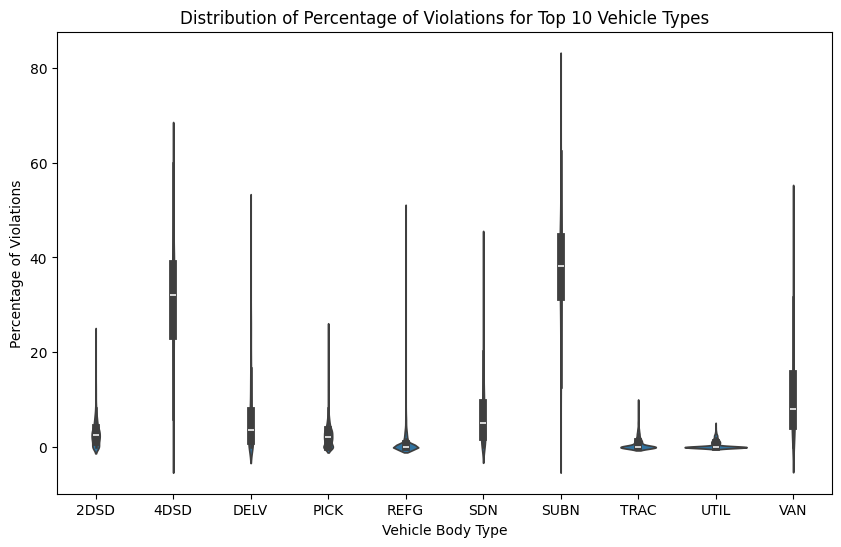

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.violinplot(x='Vehicle Body Type', y='Percentage', data=pivot_table_percentage_top10.stack().reset_index(name='Percentage'))
plt.title('Distribution of Percentage of Violations for Top 10 Vehicle Types')
plt.xlabel('Vehicle Body Type')
plt.ylabel('Percentage of Violations')
plt.show()

In [16]:
vehicle_type = 'UTIL'

min_percentage = pivot_table_percentage_top10[vehicle_type].min()
min_percentage_location = pivot_table_percentage_top10[vehicle_type].idxmin()
min_percentage_row = min_percentage_location[0]  # Month
min_percentage_column = min_percentage_location[1]  # Violation Precinct

print(f"Minimum Percentage for {vehicle_type}: {min_percentage:.2f}%")
print(f"Month {min_percentage_row}, Violation Precinct {min_percentage_column}\n")

max_percentage = pivot_table_percentage_top10[vehicle_type].max()
max_percentage_location = pivot_table_percentage_top10[vehicle_type].idxmax()
max_percentage_row = max_percentage_location[0]  # Month
max_percentage_column = max_percentage_location[1]  # Violation Precinct

print(f"Maximum Percentage for {vehicle_type}: {max_percentage:.2f}%")
print(f"Month {max_percentage_row}, Violation Precinct {max_percentage_column}")


Minimum Percentage for UTIL: 0.00%
Month 1, Violation Precinct 5

Maximum Percentage for UTIL: 4.72%
Month 9, Violation Precinct 9


In [17]:
# pivot_table_percentage_top10.to_csv('test.csv')

In [18]:
percentage_2dsd_february_precinct23 = pivot_table_percentage_top10.loc[(6, 7), '4DSD']

print(percentage_2dsd_february_precinct23)


20.634920634920633


In [19]:
df['Issue Date'] = pd.to_datetime(df['Issue Date'])
df['Month'] = df['Issue Date'].dt.month

vehicle_type_counts = df['Vehicle Body Type'].value_counts()
top_vehicle_types = vehicle_type_counts.head(10).index
df_top_vehicle_types = df[df['Vehicle Body Type'].isin(top_vehicle_types)]
grouped_data = df_top_vehicle_types.groupby(['Month', 'Vehicle Body Type', 'Violation Precinct']).size().reset_index(name='Violation Count')

pivot_table = grouped_data.pivot_table(values='Violation Count', index=['Month', 'Violation Precinct'], columns='Vehicle Body Type', fill_value=0)
pivot_table


Vehicle Body Type         2DSD  4DSD  DELV  PICK  REFG  SDN  SUBN  TRAC  UTIL  \
Month Violation Precinct                                                        
1     1                    2.0  40.0  48.0  14.0   6.0  1.0  52.0   1.0   4.0   
      5                    1.0  27.0   7.0   4.0   3.0  1.0  48.0   0.0   0.0   
      6                    2.0  25.0  10.0   5.0   2.0  2.0  30.0   0.0   2.0   
      7                    1.0  21.0   6.0   2.0   2.0  3.0  30.0   0.0   0.0   
      9                    5.0  38.0  13.0   3.0   3.0  4.0  28.0   2.0   1.0   
...                        ...   ...   ...   ...   ...  ...   ...   ...   ...   
12    115                  2.0  54.0   5.0   3.0   1.0  6.0  67.0   0.0   3.0   
      120                  0.0   9.0   1.0   1.0   0.0  1.0  17.0   0.0   0.0   
      121                  1.0  10.0   2.0   1.0   0.0  2.0  16.0   0.0   0.0   
      122                  0.0  13.0   0.0   2.0   0.0  2.0  16.0   0.0   0.0   
      123                  0.0   6.0   0.0   0.0   0.0  0.0   3.0   0.0   0.0   

Vehicle Body Type           VAN  
Month Violation Precinct         
1     1                   105.0  
      5                    27.0  
      6                    22.0  
      7                     7.0  
      9                    16.0  
...                         ...  
12    115                  15.0  
      120                   2.0  
      121                   0.0  
      122                   1.0  
      123                   1.0  

[914 rows x 10 columns]

In [20]:
viol = pivot_table.loc[(3, 23), '4DSD']

print(viol)

20.0


### Car Types csv for years 2014-2023

In [21]:
# import pandas as pd
# import os

# directory = '../../data/main_data/cleaned'
# final_df = pd.DataFrame()

# for year in range(2014, 2024):
#     file_path = os.path.join(directory, f'Parking_Violations_Issued_{year}.csv')
#     df = pd.read_csv(file_path, low_memory=False)
#     df['Issue Date'] = pd.to_datetime(df['Issue Date'])
#     df['Month'] = df['Issue Date'].dt.month
#     vehicle_type_counts = df['Vehicle Body Type'].value_counts()
#     top_vehicle_types = vehicle_type_counts.head(10).index
#     df_top_vehicle_types = df[df['Vehicle Body Type'].isin(top_vehicle_types)]

#     grouped_data = df_top_vehicle_types.groupby(['Month', 'Vehicle Body Type', 'Violation Precinct']).size().reset_index(name='Violation Count')
#     pivot_table = grouped_data.pivot_table(values='Violation Count', index=['Month', 'Violation Precinct'], columns='Vehicle Body Type', fill_value=0)
#     pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100
#     pivot_table_percentage['Year'] = year
#     final_df = pd.concat([final_df, pivot_table_percentage])

# final_df.reset_index(inplace=True)
# final_df.reset_index(drop=True, inplace=True)
# final_df


In [22]:
# year = 2020
# month = 5
# precint = 22

# result_filter = (final_df['Year'] == year) & (final_df['Month'] == month) & (final_df['Violation Precinct'] == precint)
# result_columns = ['2DSD', '4DSD', 'DELV', 'PICK', 'REFG', 'SDN', 'SUBN', 'TRAC', 'UTIL', 'VAN', 'MCY', 'MOPD', 'TRLR']

# result = final_df.loc[result_filter, result_columns].idxmax(axis=1).values[0], final_df.loc[result_filter, result_columns].max(axis=1).values[0]

# print(f"Maximum Percentage Column: {result[0]}, Maximum Percentage Value: {result[1]:.2f}%")


In [23]:
# final_df.to_csv('../../data/final_data_to_join/collisions_temp/car_types_percentages.csv')

### Only Max Percentage Dataframe

In [24]:
import pandas as pd
import os

directory = '../../data/main_data/cleaned'
final_df = pd.DataFrame()

for year in range(2014, 2024):
    file_path = os.path.join(directory, f'Parking_Violations_Issued_{year}.csv')
    df = pd.read_csv(file_path, low_memory=False)
    df['Issue Date'] = pd.to_datetime(df['Issue Date'])
    df['Month'] = df['Issue Date'].dt.month
    vehicle_type_counts = df['Vehicle Body Type'].value_counts()
    top_vehicle_types = vehicle_type_counts.head(10).index
    df_top_vehicle_types = df[df['Vehicle Body Type'].isin(top_vehicle_types)]

    grouped_data = df_top_vehicle_types.groupby(['Month', 'Vehicle Body Type', 'Violation Precinct']).size().reset_index(name='Violation Count')
    pivot_table = grouped_data.pivot_table(values='Violation Count', index=['Month', 'Violation Precinct'], columns='Vehicle Body Type', fill_value=0)
    pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100
    pivot_table_percentage['Year'] = year

    max_percentage_columns = pivot_table_percentage.iloc[:, :-1].idxmax(axis=1)
    pivot_table_percentage['Max Percentage Column'] = max_percentage_columns
    pivot_table_percentage['Max Percentage Value'] = pivot_table_percentage.loc[:, max_percentage_columns].values.max(axis=1)

    final_df = pd.concat([final_df, pivot_table_percentage.reset_index().loc[:, ['Year', 'Month', 'Violation Precinct', 'Max Percentage Column', 'Max Percentage Value']]])

final_df.reset_index(drop=True, inplace=True)
final_df


Vehicle Body Type,Year,Month,Violation Precinct,Max Percentage Column,Max Percentage Value
0,2014,1,1,VAN,46.428571
1,2014,1,5,SUBN,29.357798
2,2014,1,6,VAN,32.142857
3,2014,1,7,4DSD,29.230769
4,2014,1,9,SUBN,27.472527
...,...,...,...,...,...
9149,2023,12,115,SUBN,48.901099
9150,2023,12,120,SUBN,47.619048
9151,2023,12,121,SUBN,58.333333
9152,2023,12,122,SUBN,48.275862


In [25]:
final_df

Vehicle Body Type,Year,Month,Violation Precinct,Max Percentage Column,Max Percentage Value
0,2014,1,1,VAN,46.428571
1,2014,1,5,SUBN,29.357798
2,2014,1,6,VAN,32.142857
3,2014,1,7,4DSD,29.230769
4,2014,1,9,SUBN,27.472527
...,...,...,...,...,...
9149,2023,12,115,SUBN,48.901099
9150,2023,12,120,SUBN,47.619048
9151,2023,12,121,SUBN,58.333333
9152,2023,12,122,SUBN,48.275862


In [26]:
final_df.to_csv('../../data/final_data_to_join/collisions_temp/car_types_max_percentage.csv')

OSError: Cannot save file into a non-existent directory: '..\..\data\final_data_to_join\collisions_temp'

### Actual Violations Dataframe (not percentages)

In [ ]:
import pandas as pd
import os

directory = '../../data/main_data/cleaned'
final_df = pd.DataFrame()

for year in range(2014, 2024):
    file_path = os.path.join(directory, f'Parking_Violations_Issued_{year}.csv')
    df = pd.read_csv(file_path, low_memory=False)
    df['Issue Date'] = pd.to_datetime(df['Issue Date'])
    df['Month'] = df['Issue Date'].dt.month
    vehicle_type_counts = df['Vehicle Body Type'].value_counts()
    top_vehicle_types = vehicle_type_counts.head(10).index
    df_top_vehicle_types = df[df['Vehicle Body Type'].isin(top_vehicle_types)]

    grouped_data = df_top_vehicle_types.groupby(['Month', 'Vehicle Body Type', 'Violation Precinct']).size().reset_index(name='Violation Count')
    pivot_table = grouped_data.pivot_table(values='Violation Count', index=['Month', 'Violation Precinct'], columns='Vehicle Body Type', fill_value=0)
    pivot_table['Year'] = year
    final_df = pd.concat([final_df, pivot_table])

final_df.reset_index(inplace=True)
final_df.reset_index(drop=True, inplace=True)
print(final_df)

In [ ]:
final_df.to_csv('../../data/final_data_to_join/collisions_temp/car_types_violations.csv')

In [ ]:
import pandas as pd
import os

directory = '../../data/main_data/cleaned'
final_df = pd.DataFrame()

for year in range(2014, 2024):
    file_path = os.path.join(directory, f'Parking_Violations_Issued_{year}.csv')
    df = pd.read_csv(file_path, low_memory=False)
    df['Issue Date'] = pd.to_datetime(df['Issue Date'])
    df['Month'] = df['Issue Date'].dt.month
    vehicle_type_counts = df['Vehicle Body Type'].value_counts()
    top_vehicle_types = vehicle_type_counts.head(10).index
    df_top_vehicle_types = df[df['Vehicle Body Type'].isin(top_vehicle_types)]

    grouped_data = df_top_vehicle_types.groupby(['Month', 'Vehicle Body Type', 'Violation Precinct']).size().reset_index(name='Violation Count')
    pivot_table = grouped_data.pivot_table(values='Violation Count', index=['Month', 'Violation Precinct'], columns='Vehicle Body Type', fill_value=0)
    pivot_table['Year'] = year

    # Find the column with the max count for each row and include only that column
    max_count_columns = pivot_table.iloc[:, :-1].idxmax(axis=1)
    pivot_table['Max Count Column'] = max_count_columns
    pivot_table['Max Count Value'] = pivot_table.loc[:, max_count_columns].values.max(axis=1)

    # Include only the columns for the max count
    final_df = pd.concat([final_df, pivot_table.reset_index()[['Year', 'Month', 'Violation Precinct', 'Max Count Column', 'Max Count Value']]])

final_df.reset_index(drop=True, inplace=True)
final_df


In [ ]:
final_df

In [ ]:
final_df.to_csv('../../data/final_data_to_join/collisions_temp/car_types_max_violations.csv')

In [ ]:
import pandas as pd

df = pd.read_csv('../../data/final_data_to_join/collisions_temp/car_types_max_percentage.csv')

mapping = {
    'VAN': 'Van',
    'SUBN': 'Suburban',
    'DELV': 'Delivery Truck',
    '4DSD': '4 Door Sedan',
    'SDN': 'Sedan',
    'TRAC': 'Tractor'
}
df['Max Percentage Column'] = df['Max Percentage Column'].replace(mapping)

In [ ]:
del df['Unnamed: 0']
df.to_csv('../../data/final_data_to_join/car_types_max_percentage_names.csv')